<a href="https://colab.research.google.com/github/Mangalis0/regression_team_2/blob/master/faatimah_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# For Faatimah

# **`Sendy Explore competition `**

# Introduction

# Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing dataset

In [0]:
train = pd.read_csv('/content/Train.csv') #training set
test = pd.read_csv('/content/Test.csv') #testing set(does not contain y variable)
riders = pd.read_csv('/content/Riders.csv') #riders info
variable_def = pd.read_csv('/content/VariableDefinitions.csv')
sample = pd.read_csv('/content/SampleSubmission.csv') #sample of competition submission, should have order no for testing set, and y predicted from model 

In [20]:
train.head(1)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.83037,-1.300406,36.829741,Rider_Id_432,745


Notes:



*   spaces in column names need to be removed 
*   to be dropped: order no, user id, vehicle type(it's only for 'Bike')
*   possible variables to be encoded: platform type, personal or business, placement, confirmation, lat and long coordinates, rider ID
*   pd.datetime for times 







In [8]:
test.head(1)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.82239,Rider_Id_192


In [9]:
riders.head(1)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159


Notes: 
*   could be joined to train?
*   what's the units for age?

*   can no of ratings be dropped? it is included in average rating





In [10]:
variable_def.head(1)

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...


In [11]:
sample.head(1)

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0


Train EDA

In [16]:
print('train contains')
print('No. of rows:', train.shape[0])
print('No. of columns:', train.shape[1])

train contains
No. of rows: 21201
No. of columns: 29


In [18]:
train.describe() #descriptive stats 

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [21]:
train.isnull().sum(axis = 0) #number of nulls per column 

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [26]:
#percentage of Nan values:
temp =round((train.isnull().sum(axis = 0)['Temperature']/21201)*100,2)
precip = round((train.isnull().sum(axis = 0)['Precipitation in millimeters']/21201)*100,2)
print(temp,'% of missing values in temp column')
print(precip,'% of missing values in precipitation column')

20.59 % of missing values in temp column
97.4 % of missing values in precipitation column


Notes: 
*   the Nans in temp will need to be imputed- either mean, mode, median 
*   precipitation should be dropped, over 90% of data is Nan



In [27]:
#understanding temp data
train.describe()['Temperature']

count    16835.000000
mean        23.258889
std          3.615768
min         11.200000
25%         20.600000
50%         23.500000
75%         26.000000
max         32.100000
Name: Temperature, dtype: float64

note: research temp data for Nairobi to see how it fits in 

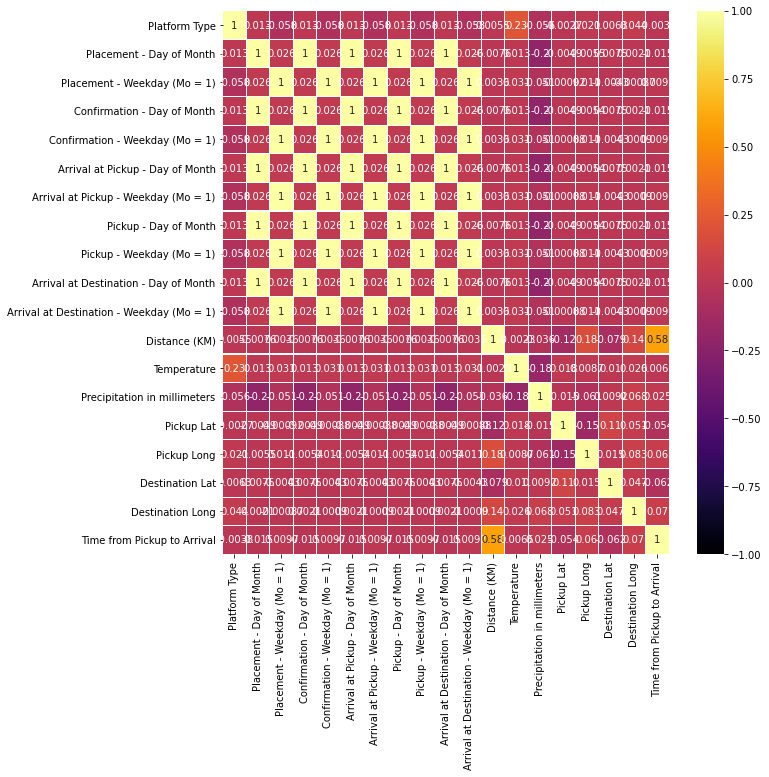

In [46]:
#plotting some prelim correlation maps for train 
train_kor = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(train_kor, vmin=-1, vmax=1, cmap='inferno', annot=True, linewidth=0.1)

needs interpretation

merge train and riders on rider ID

In [42]:
no_riders = train['Rider Id'].nunique()
print('There are', no_riders, 'different riders in the train dataset')

There are 924 different riders in the train dataset


In [43]:
no_riders_riders = riders['Rider Id'].nunique()
print('There are', no_riders_riders, 'different riders in the riders dataset')

There are 960 different riders in the riders dataset


there is 

In [35]:
new = pd.merge(train,riders, on = 'Rider Id' )# this still needs work 
new.head(1)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.83037,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
